# Activation functions

Visualize activation functions and their derivatives.

In [1]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
PLOTS = "../plots"

def save_fig(filename, folder=PLOTS):
    plt.savefig(os.path.join(folder, filename))

### Sigmoid

\begin{equation}
    \sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

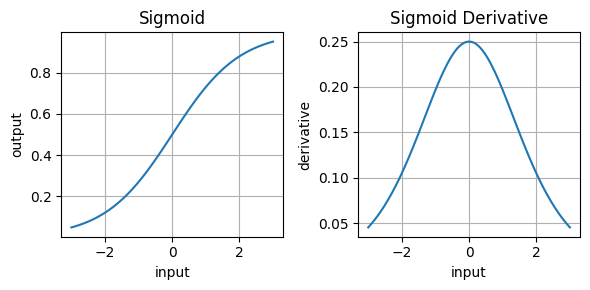

In [3]:
sigmoid = torch.nn.Sigmoid()

x = torch.linspace(-3, 3, 100, requires_grad=True)
# Compute the output of the activation functions
sigmoid_output = sigmoid(x)

# Compute the derivative of the activation function
sigmoid_deriv = torch.autograd.grad(outputs=sigmoid_output.sum(), inputs=x, retain_graph=True)[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].plot(x.detach().numpy(), sigmoid_output.detach().numpy().flatten())
ax[0].set_title('Sigmoid')
ax[0].grid(True)
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(x.detach().numpy(), sigmoid_deriv.detach().numpy().flatten())
ax[1].set_title('Sigmoid' + ' Derivative')
ax[1].grid(True)
ax[1].set_xlabel('input')
ax[1].set_ylabel('derivative')

plt.tight_layout()
plt.show()

### ReLU

\begin{equation}
    f(x) = max(0, x)
\end{equation}

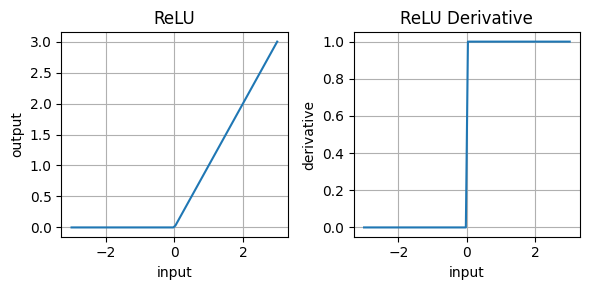

In [4]:
relu = torch.nn.ReLU()

x = torch.linspace(-3, 3, 100, requires_grad=True)

relu_output = relu(x)
relu_deriv = torch.autograd.grad(outputs=relu_output.sum(), inputs=x, retain_graph=True)[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].plot(x.detach().numpy(), relu_output.detach().numpy().flatten())
ax[0].set_title('ReLU')
ax[0].grid(True)
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(x.detach().numpy(), relu_deriv.detach().numpy().flatten())
ax[1].set_title('ReLU' + ' Derivative')
ax[1].grid(True)
ax[1].set_xlabel('input')
ax[1].set_ylabel('derivative')

plt.tight_layout()
plt.show()

### PReLU

\begin{equation}
f(x) = \begin{cases} 
      x & \text{if } x > 0 \\
      a \cdot x & \text{otherwise}
   \end{cases}
\end{equation}

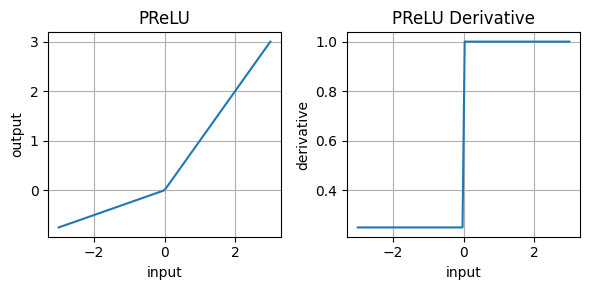

In [5]:
prelu = torch.nn.PReLU(num_parameters=1, init=0.25)
prelu_output = prelu(x)
prelu_deriv = torch.autograd.grad(outputs=prelu_output.sum(), inputs=x, retain_graph=True)[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].plot(x.detach().numpy(), prelu_output.detach().numpy().flatten())
ax[0].set_title('PReLU')
ax[0].grid(True)
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(x.detach().numpy(), prelu_deriv.detach().numpy().flatten())
ax[1].set_title('PReLU' + ' Derivative')
ax[1].grid(True)
ax[1].set_xlabel('input')
ax[1].set_ylabel('derivative')

plt.tight_layout()
plt.show()

### Tanh

\begin{equation}
    f(x) = \frac{(exp(x) - exp(-x))}{(exp(x) + exp(-x))}
\end{equation}

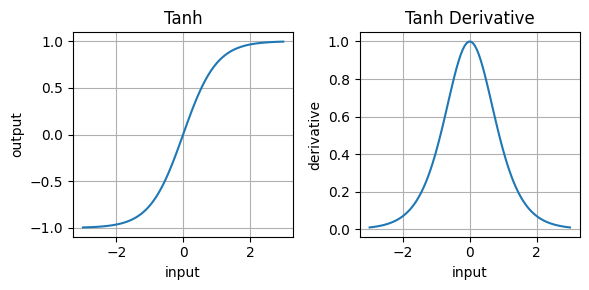

In [6]:
tanh = torch.nn.Tanh()

x = torch.linspace(-3, 3, 100, requires_grad=True)
tanh_output = tanh(x)
tanh_deriv = torch.autograd.grad(outputs=tanh_output.sum(), inputs=x, retain_graph=True)[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].plot(x.detach().numpy(), tanh_output.detach().numpy().flatten())
ax[0].set_title('Tanh')
ax[0].grid(True)
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(x.detach().numpy(), tanh_deriv.detach().numpy().flatten())
ax[1].set_title('Tanh' + ' Derivative')
ax[1].grid(True)
ax[1].set_xlabel('input')
ax[1].set_ylabel('derivative')

plt.tight_layout()
plt.show()

### Gated Activation Unit

As definedi in the WaveNet paper: https://arxiv.org/pdf/1609.03499.pdf

\begin{equation}
f(x) = \tanh(W_{f,k} * x) \cdot \sigma( W_{g,k} * x )
\end{equation}

$k$ is the layer index

$f$ is the filter

$g$ is the gate

$W$ is the learnable convolution filter

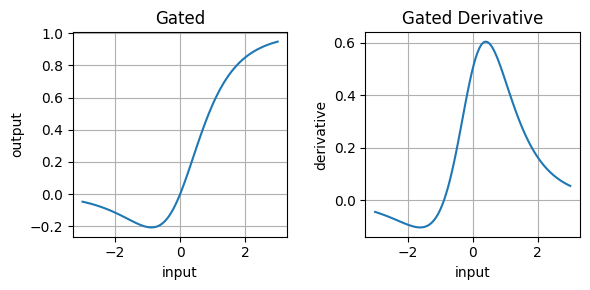

In [7]:
# Define the function
def gated(x):
    return torch.tanh(x) * torch.sigmoid(x)

gated_output = gated(x)
gated_deriv = torch.autograd.grad(outputs=gated_output.sum(), inputs=x, retain_graph=True)[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].plot(x.detach().numpy(), gated_output.detach().numpy().flatten())
ax[0].set_title('Gated')
ax[0].grid(True)
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(x.detach().numpy(), gated_deriv.detach().numpy().flatten())
ax[1].set_title('Gated' + ' Derivative')
ax[1].grid(True)
ax[1].set_xlabel('input')
ax[1].set_ylabel('derivative')
plt.tight_layout()
plt.show()

## Softplus function

\begin{equation}
    \text{Softplus}(x) = \frac{1}{\beta} * \log(1 + \exp(\beta * x))
\end{equation}


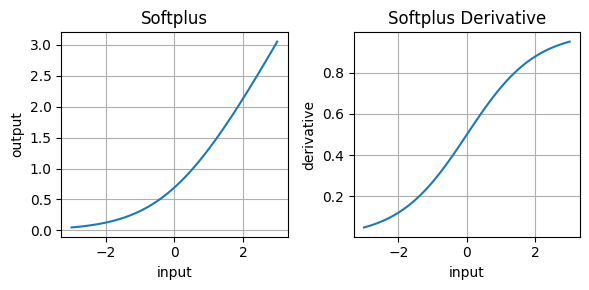

In [8]:
softplus = torch.nn.Softplus()
softplus_output = softplus(x)

softplus_deriv = torch.autograd.grad(outputs=softplus_output.sum(), inputs=x, retain_graph=True)[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].plot(x.detach().numpy(), softplus_output.detach().numpy().flatten())
ax[0].set_title('Softplus')
ax[0].grid(True)
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(x.detach().numpy(), softplus_deriv.detach().numpy().flatten())
ax[1].set_title('Softplus' + ' Derivative')
ax[1].grid(True)
ax[1].set_xlabel('input')
ax[1].set_ylabel('derivative')
plt.tight_layout()
plt.show()

## Gated Linear Unit (GLU)

\begin{equation}
    GLU(a, b) = a \otimes \sigma(b)
\end{equation}

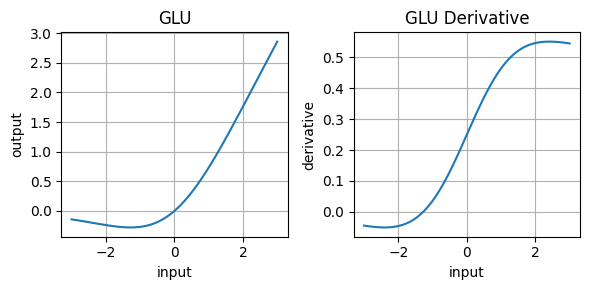

In [9]:
# GLU activation requires 2n input for n output
glu_input = torch.cat((x, x), 0).reshape(2, -1)

glu_output = torch.nn.functional.glu(glu_input, dim=0)
glu_deriv = torch.autograd.grad(outputs=glu_output.sum(), inputs=glu_input, retain_graph=True)[0]

glu_deriv = glu_deriv.mean(dim=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].plot(x.detach().numpy(), glu_output.detach().numpy().flatten())
ax[0].set_title('GLU')
ax[0].grid(True)
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(x.detach().numpy(), glu_deriv.detach().numpy().flatten())
ax[1].set_title('GLU' + ' Derivative')
ax[1].grid(True)
ax[1].set_xlabel('input')
ax[1].set_ylabel('derivative')
plt.tight_layout()
plt.show()

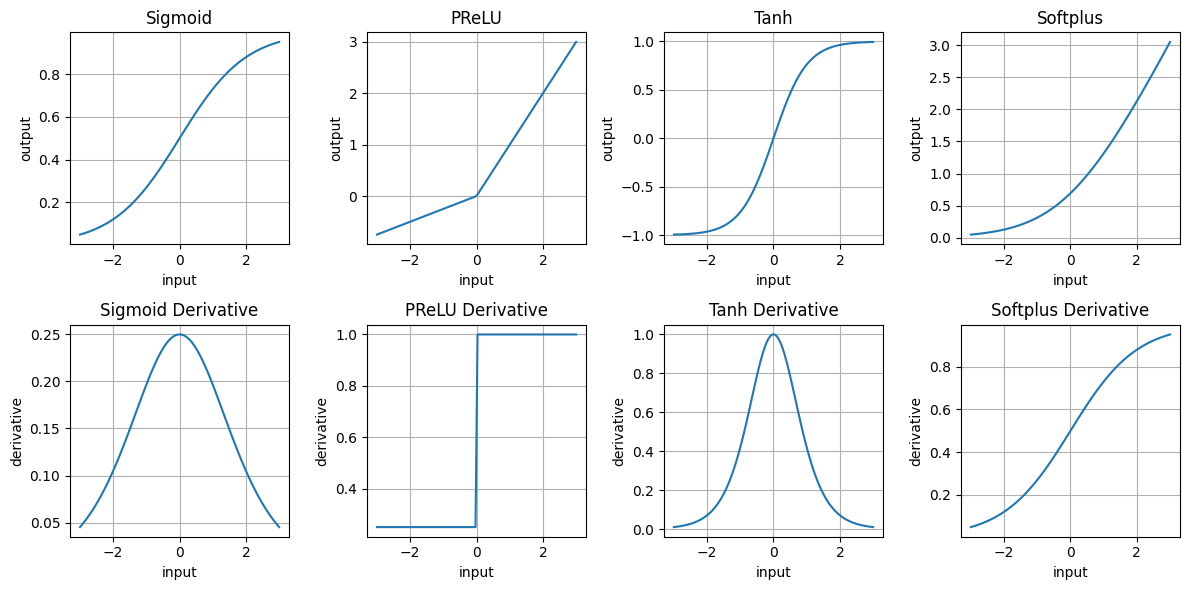

In [10]:
activations_list = ['Sigmoid', 'PReLU', 'Tanh', 'Softplus']
outputs = [sigmoid_output, prelu_output, tanh_output, softplus_output]
derivs = [sigmoid_deriv, prelu_deriv, tanh_deriv, softplus_deriv]

def plot_activations(rows, cols, activations_list, x, outputs, derivs):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i, activation in enumerate(activations_list):
        ax[0, i].plot(x.detach().numpy(), outputs[i].detach().numpy().flatten())
        ax[0, i].set_title(activation)
        ax[0, i].grid(True)
        ax[0, i].set_xlabel('input')
        ax[0, i].set_ylabel('output')

        ax[1, i].plot(x.detach().numpy(), derivs[i].detach().numpy().flatten())
        ax[1, i].set_title(activation + ' Derivative')
        ax[1, i].grid(True)
        ax[1, i].set_xlabel('input')
        ax[1, i].set_ylabel('derivative')

    plt.tight_layout()
    plt.show()

plot_activations(2, 4, activations_list, x, outputs, derivs)